In [9]:
import h5py
import time
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import shift
from skimage import io, color
import numpy as np
from numpy import log2 as log2
from PIL import Image
import scipy.stats
from scipy import optimize
from numpy import asarray
import matplotlib.pyplot as plt
from scipy.optimize import dual_annealing
from sklearn import preprocessing
from numpy.random import rand
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi
import cv2 
from scipy.ndimage.interpolation import shift
from scipy.optimize import differential_evolution
import scipy.misc
import imageio
from numpy import asarray
from numpy import exp
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
#path = '//10.233.36.34/aiperception_cluster_homes/stiwari/Semseg op/Predictions_array/segmentation'


In [2]:
path_Semseg = 'C:/Users/bjqb7h/Downloads/Thesis2022/SEMSEGGPS'
log  = '/AtCityBMW_Applanix-20220601T115459Z469'
semsegpath ='C:/Users/bjqb7h/Downloads/Thesis2022/semsegimage'
path_GPS = 'C:/Users/bjqb7h/Downloads/Thesis2022/NUMPY/New/'
log_GPS  = 'AtCityBMW_Applanix-20220601T115459Z469'

In [3]:
h5f = h5py.File(path_Semseg +log+'.h5','r')
dset = h5f.get('grid_prediction')
SemsegData = np.reshape(dset,(2093,160,160,2))
h5fGPS = h5py.File(path_GPS+log_GPS+'.hdf5','r')
dset2 = h5fGPS.get(log+'/Image data')

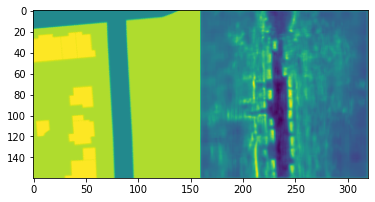

In [103]:
t1_slice = dset2[100,:,:,1]
t1_set = np.flip(dset2[:,:,:,1],axis=1)
t1_slice = np.flip(t1_slice, axis=1)
GPS_data = t1_slice

#Using SEMSEG HDF5 DIRECTLY
t2_set = np.rot90(SemsegData[:,:,:,1],2)
t2_slice = np.rot90(SemsegData[100,:,:,1],2)
t2_slice = asarray(t2_slice)
Semseg_data = t2_slice
Semseg_data=Semseg_data.astype(np.float64)


GPS_data= GPS_data/GPS_data.max()
Semseg_data = Semseg_data/Semseg_data.max()
t1_set = t1_set/t1_set.max()
t2_set = t2_set/t2_set.max()#


    plt.imshow(np.hstack((GPS_data, Semseg_data)))

In [104]:

FILTER_SIGMA = 1.5
BOUNDS = [(-1, 1), (-1, 1)]  # Bounds (in pixels) supported by mutual information based correlator

def main_mi_reg(ref_image, cmp_image, bounds=BOUNDS):
    """
    Correlator based onMutual Information Algorithm
    http://www.sci.utah.edu/~fletcher/CS7960/slides/Yen-Yun.pdf
    :param ref_image: ndarray, containing reference image data
    :param cmp_image: ndarray, containing comparison image data
    :param bounds: sequence, bounds paramater in scipy.optimize.differential_evolution
    :return: (residual in X, residual in Y, match height)
    """
    obj_func = lambda dx_dy: -__mutual_information(shift(ref_image, dx_dy), cmp_image)
    opt_res = differential_evolution(obj_func, bounds)
    (dx, dy), match_height = -opt_res.x, -opt_res.fun
    return dx, dy, match_height

def __mutual_information(ref_image_crop, cmp_image, bins=256, normed=False):
    """
    :param ref_image_crop: ndarray, cropped image from the center of reference image, needs to be same size as `cmp_image`
    :param cmp_image: ndarray, comparison image data data
    :param bins: number of histogram bins
    :param normed: return normalized mutual information
    :return: mutual information values
    """
    ref_range = (ref_image_crop.min(), ref_image_crop.max())
    cmp_range = (cmp_image.min(), cmp_image.max())
    joint_hist, _, _ = np.histogram2d(ref_image_crop.flatten(), cmp_image.flatten(), bins=bins, range=[ref_range, cmp_range])
    ref_hist, _ = np.histogram(ref_image_crop, bins=bins, range=ref_range)
    cmp_hist, _ = np.histogram(cmp_image, bins=bins, range=cmp_range)
    joint_ent = __entropy(joint_hist)
    ref_ent = __entropy(ref_hist)
    cmp_ent = __entropy(cmp_hist)
    mutual_info = ref_ent + cmp_ent - joint_ent
    if normed:
        mutual_info = mutual_info / np.sqrt(ref_ent * cmp_ent)
    return mutual_info


def __entropy(img_hist):
    """
    :param img_hist: Array containing image histogram
    :return: image entropy
    """
    img_hist = img_hist / float(np.sum(img_hist))
    img_hist = img_hist[np.nonzero(img_hist)]
    return -np.sum(img_hist * np.log2(img_hist))

In [106]:
dx, dy, match_height = main_mi_reg(GPS_data,Semseg_data)
print(dx, dy, match_height)

-0.07519719444763655 0.4583338413954262 0.5785476905877474


In [109]:
print(match_height)

0.5785476905877474


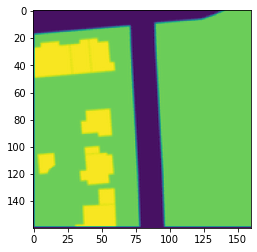

In [110]:
im_shifted = shift(GPS_data, [dx, dy])
plt.imshow(im_shifted)

In [50]:
Semseg_data = np.array(Semseg_data, np.int64)
im_shifted = np.array(im_shifted,np.int64)

In [111]:
dx1, dy1, match_height1 = main_mi_reg(Semseg_data,im_shifted)
print(dx1, dy1, match_height1)

0.950302989360332 -0.8615737252939752 0.5774830532973549


NameError: name 'main_poc_reg' is not defined